# **Homework III**
##### Grupo 41
##### Raquel Rodrigues (ist1106322) e Leonor Figueira (ist1106157)

## II. Programming and critical analysis

#### Pergunta 1)
#### a.

/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/skle

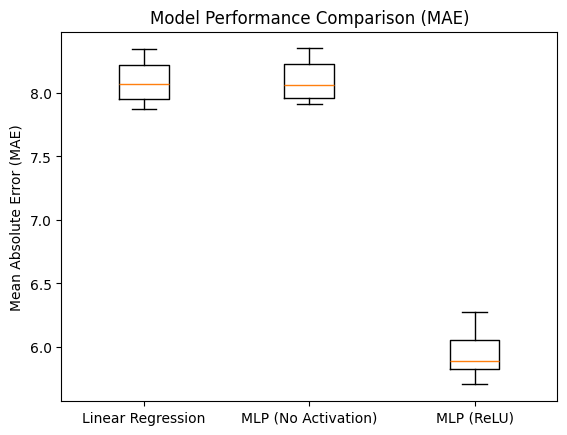

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('parkinsons.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']


# Lists to store MAEs for each model
mae_linear = []
mae_mlp_no_activ_func = []
mae_mlp_relu = []


# Perform 10 separate runs with different random train-test splits, random_state=i
for i in range(1, 11):

    # Split the data (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # 1. Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_lr))
    
    # 2. MLP Regressor with 2 hidden layers, no activation function
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_activation.predict(X_test)
    mae_mlp_no_activ_func.append(mean_absolute_error(y_test, y_pred_mlp_no_act))
    
    # 3. MLP Regressor with 2 hidden layers, ReLU activation function
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

# Create a boxplot of the test MAEs
plt.boxplot([mae_linear, mae_mlp_no_activ_func, mae_mlp_relu], labels=['Linear Regression', 'MLP (No Activation)', 'MLP (ReLU)'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance Comparison (MAE)')
plt.show()


/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonor/.local/lib/python3.9/site-packages/skle

Melhores parâmetros: {'alpha': 0.001, 'learning_rate_init': 0.01, 'batch_size': 32.0}
Melhor MAE no conjunto de teste: 3.65096


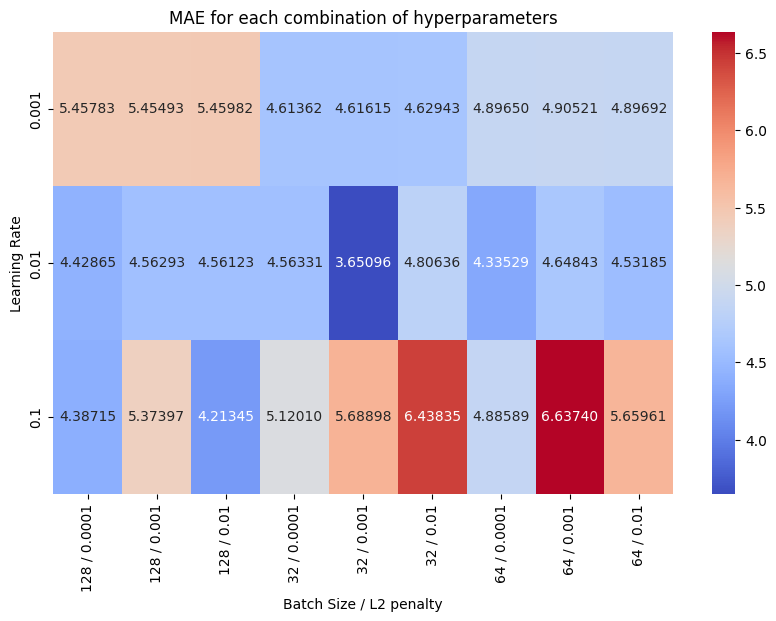

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('parkinsons.csv')

# Separate features from target
X = data.drop(columns=['target'])
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
alpha_values = [0.0001, 0.001, 0.01]  # L2 penalty
learning_rate_values = [0.001, 0.01, 0.1]  # Learning rate
batch_size_values = [32, 64, 128]  # Batch sizes

# List to store results
results = []

# Perform Grid Search
for alpha in alpha_values:
    for learning_rate in learning_rate_values:
        for batch_size in batch_size_values:

            # Define the MLPRegressor
            mlp = MLPRegressor(hidden_layer_sizes=(10, 10), alpha=alpha, learning_rate_init=learning_rate, batch_size=batch_size, random_state=0)
            
            # Train the model
            mlp.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = mlp.predict(X_test)
            
            # Calculate the MAE (Mean Absolute Error) on the test set
            mae = mean_absolute_error(y_test, y_pred)
            
            # Store the results (hyperparameters and their corresponding MAE)
            results.append({
                'alpha': alpha,
                'learning_rate_init': learning_rate,
                'batch_size': batch_size,
                'mae': mae
            })

# Convert the list of results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the best hyperparameters (the ones that give the minimum MAE)
best_params = results_df.loc[results_df['mae'].idxmin()]
best_mae = best_params['mae']

# Print the best hyperparameters and the corresponding MAE value
print(f"Melhores parâmetros: {best_params[['alpha', 'learning_rate_init', 'batch_size']].to_dict()}")
print(f"Melhor MAE no conjunto de teste: {best_mae:.5f}")

# Create a new combined column to include "batch_size" and "alpha"
results_df['comb_columns'] = results_df['batch_size'].astype(str) + ' / ' + results_df['alpha'].astype(str)

# Pivot the DataFrame so that it's suitable for the plot of a heatmap
pivot_table = results_df.pivot(index="learning_rate_init", columns="comb_columns", values="mae")

# Plot the results as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap="coolwarm")
plt.title('MAE for each combination of hyperparameters')
plt.xlabel('Batch Size / L2 penalty')
plt.ylabel('Learning Rate')
plt.show()
